In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.stats import chi2_contingency

import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [3]:
# Study data files 
csv_file = Path('heart_2022_no_nans.csv')

# Read the mouse data and the study results
hd_data_df = pd.read_csv(csv_file)

In [4]:
hd_data_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
hd_data_df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [27]:
new_df = hd_data_df[['State','Sex','GeneralHealth','PhysicalActivities','SleepHours', 'HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer','HadCOPD', 'HadDiabetes','SmokerStatus',
                      'ECigaretteUsage','DifficultyWalking', 'AgeCategory','RaceEthnicityCategory','BMI', 'AlcoholDrinkers' ]]
new_df.head()

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDiabetes,SmokerStatus,ECigaretteUsage,DifficultyWalking,AgeCategory,RaceEthnicityCategory,BMI,AlcoholDrinkers
0,Alabama,Female,Very good,Yes,9.0,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No
1,Alabama,Male,Very good,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,Never used e-cigarettes in my entire life,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No
2,Alabama,Male,Very good,No,8.0,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes
3,Alabama,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No
4,Alabama,Female,Good,Yes,5.0,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 80 or older,"White only, Non-Hispanic",33.07,No


In [9]:
new_df.count()

State                    246022
Sex                      246022
GeneralHealth            246022
PhysicalActivities       246022
SleepHours               246022
HadHeartAttack           246022
HadAngina                246022
HadStroke                246022
HadAsthma                246022
HadSkinCancer            246022
HadCOPD                  246022
HadDiabetes              246022
SmokerStatus             246022
ECigaretteUsage          246022
DifficultyWalking        246022
AgeCategory              246022
RaceEthnicityCategory    246022
BMI                      246022
AlcoholDrinkers          246022
dtype: int64

In [56]:
columns = {'GeneralHealth':'Health','PhysicalActivities':'PA', 'SleepHours':'Sleep','HadHeartAttack':'Heart Attack', 
           'HadAngina':'Angina', 'HadStroke':'Stroke','HadAsthma':'Asthma','HadSkinCancer':'Skin Cancer','HadCOPD':'COPD',
           'HadDiabetes':'Diabetes','SmokerStatus':'Smoker','ECigaretteUsage':'E-Smoker', 'DifficultyWalking':'Difficulty Walking',
           'AgeCategory':'Age','RaceEthnicityCategory':'Race','AlcoholDrinkers':'Alcohol'
           }
renamed_data_df = new_df.rename(columns=columns)
renamed_data_df.head(20)

,State,Sex,Health,PA,Sleep,Heart Attack,Angina,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,E-Smoker,Difficulty Walking,Age,Race,BMI,Alcohol
0,Alabama,Female,Very good,Yes,9.0,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No
1,Alabama,Male,Very good,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,Never used e-cigarettes in my entire life,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No
2,Alabama,Male,Very good,No,8.0,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes
3,Alabama,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No
4,Alabama,Female,Good,Yes,5.0,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 80 or older,"White only, Non-Hispanic",33.07,No
5,Alabama,Male,Good,Yes,7.0,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 50 to 54,"White only, Non-Hispanic",34.96,Yes
6,Alabama,Female,Good,Yes,8.0,No,No,Yes,No,No,No,Yes,Never smoked,Never used e-cigarettes in my entire life,No,Age 80 or older,"Black only, Non-Hispanic",33.30,No
7,Alabama,Male,Fair,Yes,8.0,Yes,Yes,No,No,Yes,No,Yes,Never smoked,Never used e-cigarettes in my entire life,No,Age 75 to 79,"White only, Non-Hispanic",24.37,No
8,Alabama,Male,Good,No,6.0,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,Age 40 to 44,"White only, Non-Hispanic",26.94,No
9,Alabama,Female,Very good,Yes,7.0,No,No,No,Yes,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,No,Age 75 to 79,"White only, Non-Hispanic",22.60,No


In [57]:
renamed_data_df.value_counts('E-Smoker')

E-Smoker
Never used e-cigarettes in my entire life    190128
Not at all (right now)                        43281
Use them some days                             6658
Use them every day                             5955
Name: count, dtype: int64

In [12]:
renamed_data_df.value_counts('Smoker')

Smoker
Never smoked                             147737
Former smoker                             68527
Current smoker - now smokes every day     21659
Current smoker - now smokes some days      8099
Name: count, dtype: int64

In [58]:
renamed_data_df.value_counts('Age')

Age
Age 65 to 69       28557
Age 60 to 64       26720
Age 70 to 74       25739
Age 55 to 59       22224
Age 50 to 54       19913
Age 75 to 79       18136
Age 80 or older    17816
Age 40 to 44       16973
Age 45 to 49       16753
Age 35 to 39       15614
Age 30 to 34       13346
Age 18 to 24       13122
Age 25 to 29       11109
Name: count, dtype: int64

In [59]:
renamed_data_df.value_counts('Race')

Race
White only, Non-Hispanic         186336
Hispanic                          22570
Black only, Non-Hispanic          19330
Other race only, Non-Hispanic     12205
Multiracial, Non-Hispanic          5581
Name: count, dtype: int64

In [60]:
renamed_data_df.value_counts('Health')

Health
Very good    86999
Good         77409
Excellent    41525
Fair         30659
Poor          9430
Name: count, dtype: int64

In [61]:
renamed_data_df.value_counts('Sex')

Sex
Female    127811
Male      118211
Name: count, dtype: int64

In [62]:
renamed_data_df.value_counts('State')

State
Washington              15000
Maryland                 9165
Minnesota                9161
Ohio                     8995
New York                 8923
Texas                    7408
Florida                  7315
Kansas                   6145
Wisconsin                6126
Maine                    6013
Iowa                     5672
Hawaii                   5596
Virginia                 5565
Indiana                  5502
South Carolina           5471
Massachusetts            5465
Arizona                  5462
Utah                     5373
Michigan                 5370
Colorado                 5159
Nebraska                 5107
California               5096
Connecticut              5053
Georgia                  4978
Vermont                  4845
South Dakota             4405
Montana                  4264
Missouri                 4195
New Jersey               3967
New Hampshire            3756
Puerto Rico              3589
Idaho                    3468
Alaska                   3205
Rhod

In [63]:
renamed_data_df['HD'] = np.where((renamed_data_df['Angina'] == 'Yes') | (renamed_data_df['Heart Attack'] == 'Yes'), 'Yes', 'No')
renamed_data_df.head(10)

,State,Sex,Health,PA,Sleep,Heart Attack,Angina,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,E-Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,HD
0,Alabama,Female,Very good,Yes,9.0,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No,No
1,Alabama,Male,Very good,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,Never used e-cigarettes in my entire life,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No,No
2,Alabama,Male,Very good,No,8.0,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes,No
3,Alabama,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No,No
4,Alabama,Female,Good,Yes,5.0,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 80 or older,"White only, Non-Hispanic",33.07,No,No
5,Alabama,Male,Good,Yes,7.0,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 50 to 54,"White only, Non-Hispanic",34.96,Yes,No
6,Alabama,Female,Good,Yes,8.0,No,No,Yes,No,No,No,Yes,Never smoked,Never used e-cigarettes in my entire life,No,Age 80 or older,"Black only, Non-Hispanic",33.30,No,No
7,Alabama,Male,Fair,Yes,8.0,Yes,Yes,No,No,Yes,No,Yes,Never smoked,Never used e-cigarettes in my entire life,No,Age 75 to 79,"White only, Non-Hispanic",24.37,No,Yes
8,Alabama,Male,Good,No,6.0,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,Age 40 to 44,"White only, Non-Hispanic",26.94,No,No
9,Alabama,Female,Very good,Yes,7.0,No,No,No,Yes,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,No,Age 75 to 79,"White only, Non-Hispanic",22.60,No,No


In [64]:
filtered_data_df = renamed_data_df.drop(columns=['Angina', 'Heart Attack','E-Smoker'])
filtered_data_df

,State,Sex,Health,PA,Sleep,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,HD
0,Alabama,Female,Very good,Yes,9.0,No,No,No,No,No,Former smoker,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No,No
1,Alabama,Male,Very good,Yes,6.0,No,No,No,No,Yes,Former smoker,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No,No
2,Alabama,Male,Very good,No,8.0,No,No,No,No,No,Former smoker,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes,No
3,Alabama,Female,Fair,Yes,9.0,No,No,Yes,No,No,Never smoked,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No,No
4,Alabama,Female,Good,Yes,5.0,No,No,No,No,No,Never smoked,No,Age 80 or older,"White only, Non-Hispanic",33.07,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,Yes,6.0,No,No,No,No,No,Never smoked,No,Age 60 to 64,"White only, Non-Hispanic",32.28,Yes,No
246018,Virgin Islands,Female,Fair,Yes,7.0,No,No,No,No,No,Never smoked,No,Age 25 to 29,"Black only, Non-Hispanic",24.34,No,No
246019,Virgin Islands,Male,Good,Yes,7.0,Yes,No,No,No,Yes,Never smoked,No,Age 65 to 69,"Multiracial, Non-Hispanic",29.86,Yes,No
246020,Virgin Islands,Female,Excellent,Yes,7.0,No,No,No,No,No,Never smoked,No,Age 50 to 54,"Black only, Non-Hispanic",28.66,No,No


In [65]:
filtered_data_df.nunique()

State                   54
Sex                      2
Health                   5
PA                       2
Sleep                   23
Stroke                   2
Asthma                   2
Skin Cancer              2
COPD                     2
Diabetes                 4
Smoker                   4
Difficulty Walking       2
Age                     13
Race                     5
BMI                   3514
Alcohol                  2
HD                       2
dtype: int64

In [101]:
filtered_data_df.value_counts('Smoker')

Smoker
No                                       147737
Yes                                       90186
Current smoker - now smokes some days      8099
Name: count, dtype: int64

In [104]:
filtered_data_df = filtered_data_df[filtered_data_df.columns].replace({'Never smoked':'No', 'Former smoker':'Yes', 'Current smoker - now smokes every day':'Yes', 'Current smoker - now smokes some days':'Yes'})
filtered_data_df['Smoker'].value_counts()

Smoker
No     147737
Yes     98285
Name: count, dtype: int64

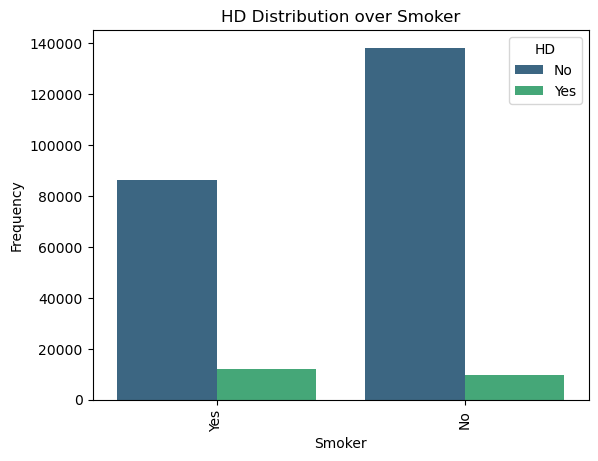

In [105]:
sns.countplot(x=filtered_data_df['Smoker'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over Smoker')

# Set labels and rotate x-axis labels
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

In [88]:
filtered_data_df['Diabetes'].value_counts()

Diabetes
No                                         204834
Yes                                         33813
No, pre-diabetes or borderline diabetes      5392
Yes, but only during pregnancy (female)      1983
Name: count, dtype: int64

In [93]:
filtered_data_df = filtered_data_df[filtered_data_df.columns].replace({'No, pre-diabetes or borderline diabetes':'No','Yes, but only during pregnancy (female)':'Yes' })
filtered_data_df['Diabetes'].value_counts()

Diabetes
No     210226
Yes     35796
Name: count, dtype: int64

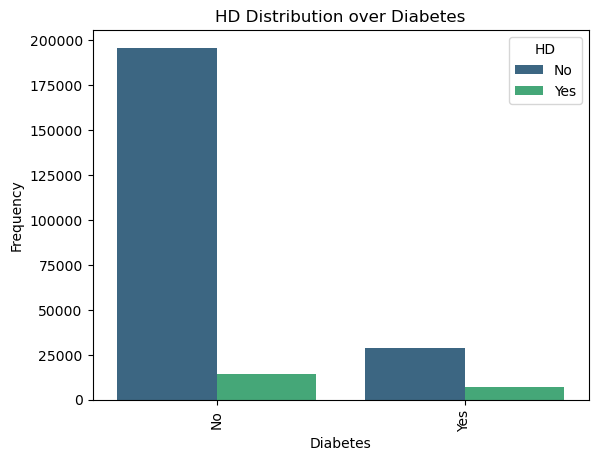

In [95]:
sns.countplot(x=filtered_data_df['Diabetes'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over Diabetes')

# Set labels and rotate x-axis labels
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

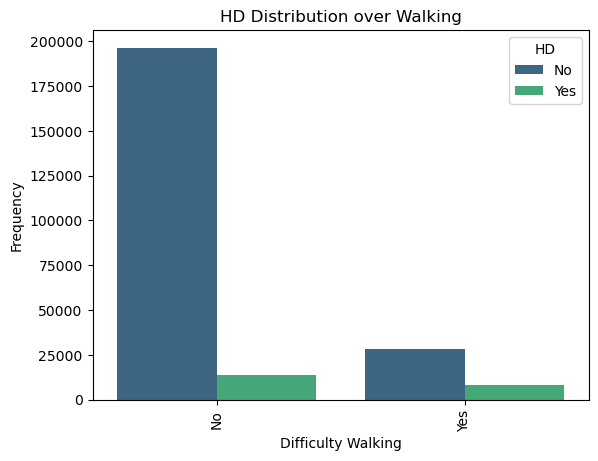

In [81]:
sns.countplot(x=filtered_data_df['Difficulty Walking'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over Walking')

# Set labels and rotate x-axis labels
plt.xlabel('Difficulty Walking')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

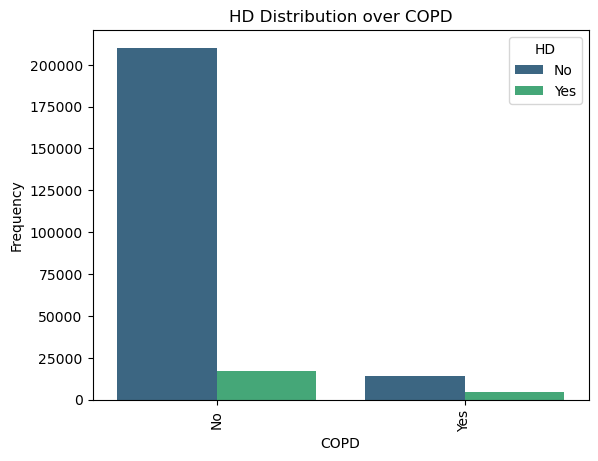

In [87]:
sns.countplot(x=filtered_data_df['COPD'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over COPD')

# Set labels and rotate x-axis labels
plt.xlabel('COPD')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

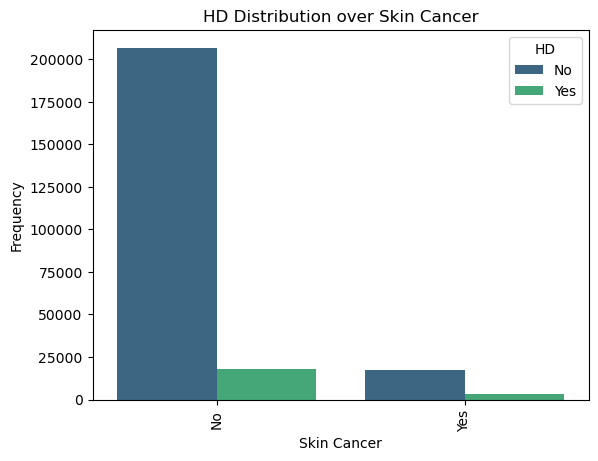

In [86]:
sns.countplot(x=filtered_data_df['Skin Cancer'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over Skin Cancer')

# Set labels and rotate x-axis labels
plt.xlabel('Skin Cancer')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

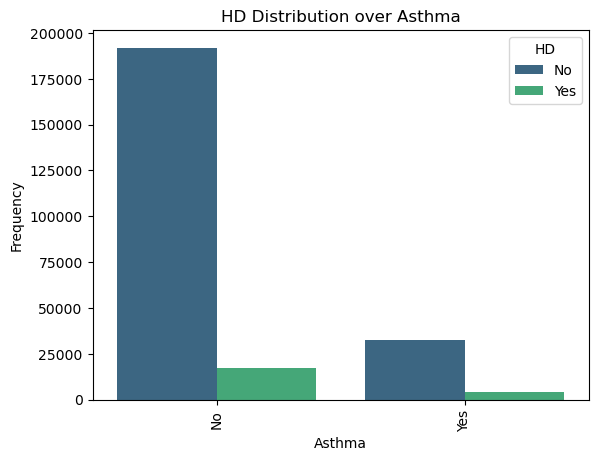

In [77]:
sns.countplot(x=filtered_data_df['Asthma'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over Asthma')

# Set labels and rotate x-axis labels
plt.xlabel('Asthma')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

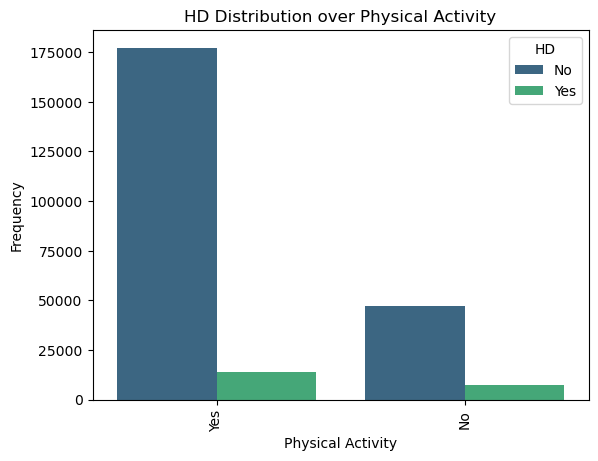

In [76]:
sns.countplot(x=filtered_data_df['PA'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over Physical Activity')

# Set labels and rotate x-axis labels
plt.xlabel('Physical Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

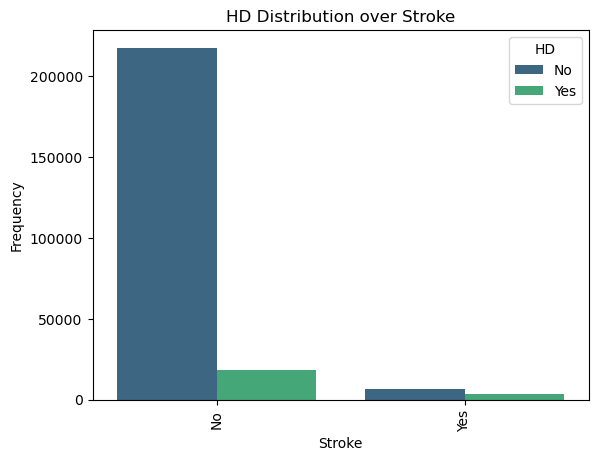

In [74]:
sns.countplot(x=filtered_data_df['Stroke'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over Stroke')

# Set labels and rotate x-axis labels
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

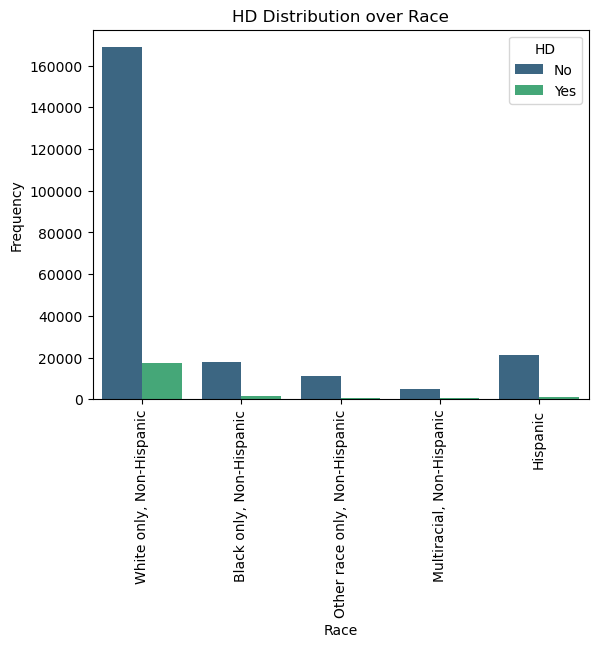

In [70]:
sns.countplot(x=filtered_data_df['Race'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over Race')

# Set labels and rotate x-axis labels
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

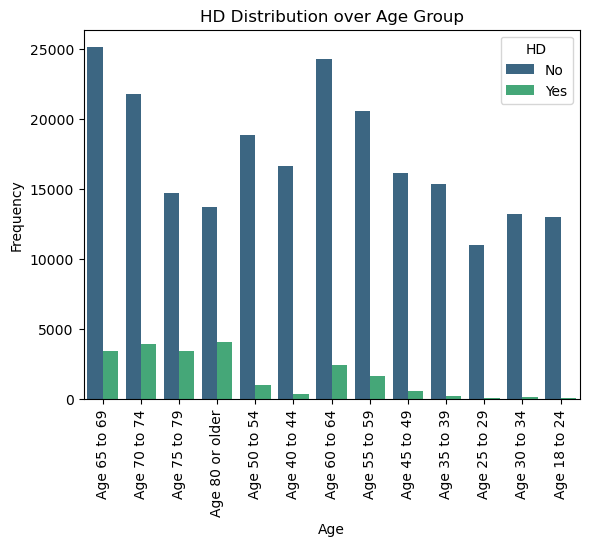

In [71]:
sns.countplot(x=filtered_data_df['Age'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over Age Group')

# Set labels and rotate x-axis labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

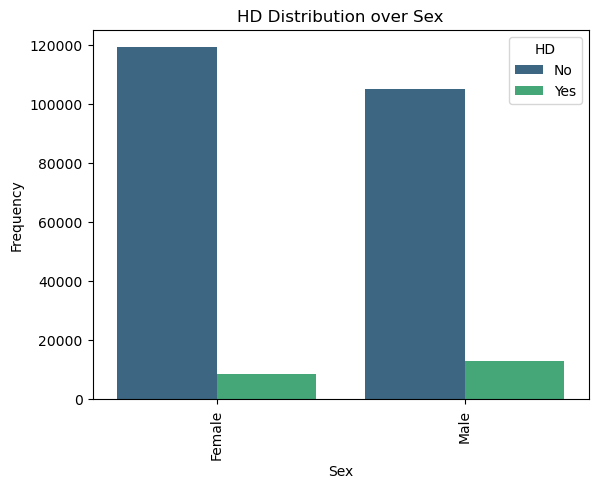

In [72]:
sns.countplot(x=filtered_data_df['Sex'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over Sex')

# Set labels and rotate x-axis labels
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

In [114]:
contingency_table = pd.crosstab(filtered_data_df['Sex'], filtered_data_df['HD'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Pearson's Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=filtered_data_df['Sex'].unique(), columns=filtered_data_df['HD'].unique()))

Contingency Table:
HD          No    Yes
Sex                  
Female  119233   8578
Male    105173  13038

Chi-square Statistic: 1428.1811955752205
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
                   No           Yes
Female  116581.262107  11229.737893
Male    107824.737893  10386.262107


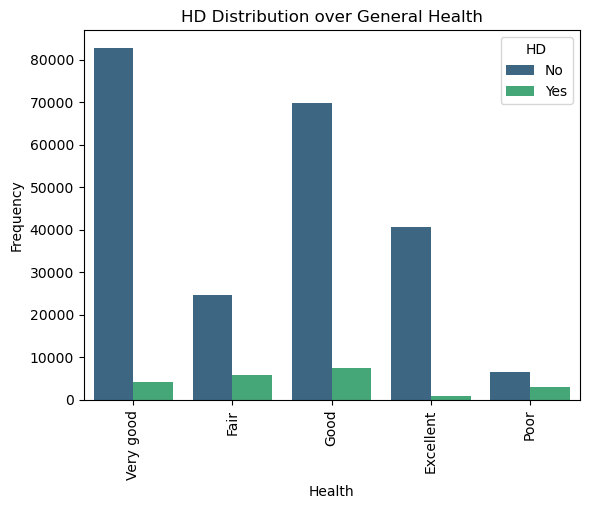

In [73]:
sns.countplot(x=filtered_data_df['Health'], hue='HD', data=filtered_data_df, palette='viridis')

plt.title('HD Distribution over General Health')

# Set labels and rotate x-axis labels
plt.xlabel('Health')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

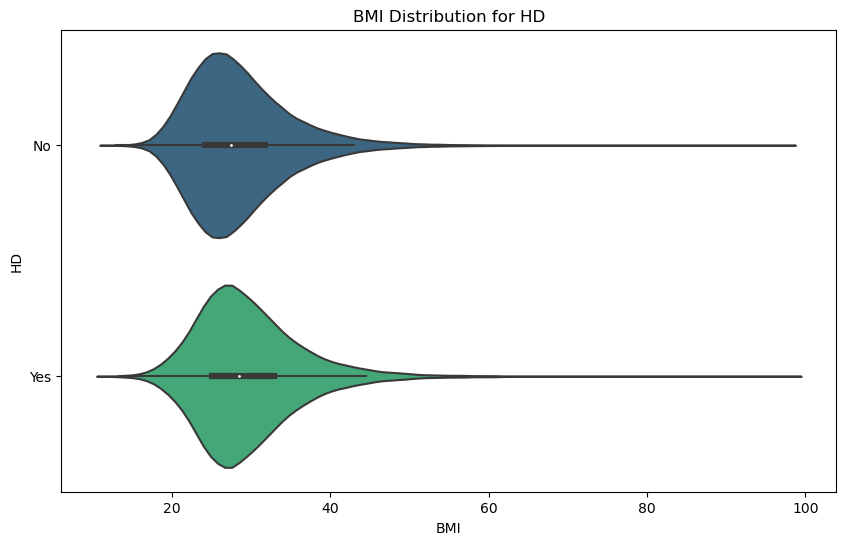

In [111]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='BMI', y='HD', data=filtered_data_df, palette='viridis')
plt.title('BMI Distribution for HD')
plt.xlabel('BMI')
plt.ylabel('HD')
plt.show()

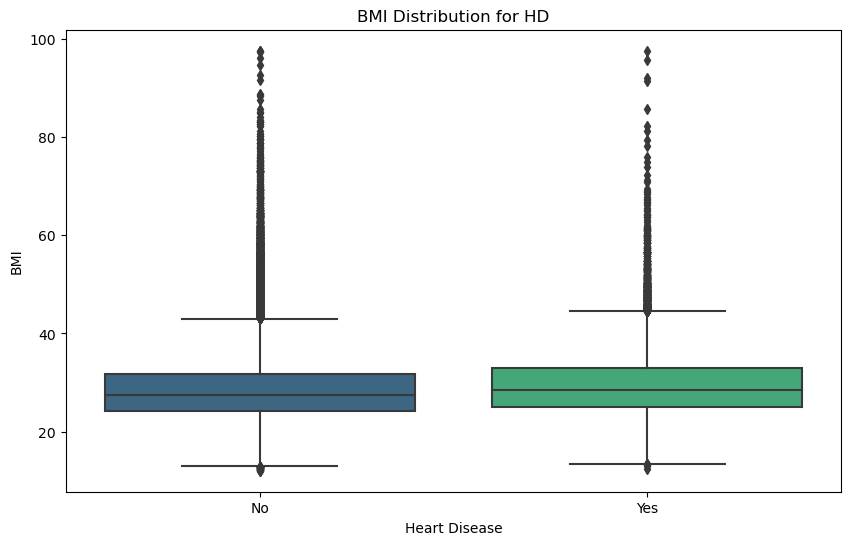

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HD', y='BMI', data=filtered_data_df, palette='viridis')
plt.title('BMI Distribution for HD')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()